In [18]:
import pandas as pd
from bs4 import BeautifulSoup
import tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import preprocessor as p
import requests
from textblob.sentiments import NaiveBayesAnalyzer
import re
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [2]:
p.set_options(p.OPT.URL, p.OPT.RESERVED)   #will be used later to clean the tweets

In [3]:
#my twitter developer keys never worked and emails went back and forth with Twitter so I had to use these ultimately
consumer_key = '9g7ZRoL31dISnGlCNopfEysOq'
consumer_secret = 'zrCf3NHJ0SHEVuP2asFosjAKRGm7HdebkZgTNbtiSRR5k389nG'
access_token = '14093270-yMNg3eDdghzcQ70kXtIfdTTEK2dIpRblHlyEyom0N'
access_token_secret = 'MvE74KZBKSUpWRcZo04AY17hcv73sQpQmtkoED1RD1Up6'

In [4]:
auth = tweepy.OAuthHandler(consumer_key,          #authenticates the info with twitter
                           consumer_secret)

In [5]:
api = tweepy.API(auth, wait_on_rate_limit=True,           #creates the api object
                 wait_on_rate_limit_notify=True)

In [6]:
from tweetutilities import print_tweets

ModuleNotFoundError: No module named 'geopy'

### Running the last 300 tweets from Lebron James

In [19]:
#Extract 300 tweets from Lebron James
posts = api.user_timeline(screen_name = "KingJames", count = 300, lang = "en", tweet_mode = "extended")

#Printing the last 300 tweets
i = 1
for tweet in posts[0:300]:
    print(str(i) + ') ' + tweet.full_text + '/n')
    i = i + 1

1) @bubbawatson Love you too brother!! 🙏🏾✊🏾❤️👑/n
2) Hate on me, I blew but I'm the same OG
People warned me: "When you're on top there's envy"/n
3) OMFG!!!!!!!! 🤯🤯🤯🤯🤯🤯 https://t.co/7cAyX6KuXs/n
4) Where y'all finding all this content lately. Man o man! Happy Mother's Day to all and I love what I do! ❤️🏀  #ThekidfromAKRON 👑 https://t.co/iP784swwSi/n
5) Yessir!!!! Went yard then hit the "Silencer"!! Ayyyyyyeee 🫡✊🏾👑 https://t.co/hRoDgnFbOo/n
6) @patbev21 You already know bro!!! 🙏🏾✊🏾👑/n
7) @KingJosiah54 🤣🤣🤣🤣🤣🤣🤣🤣🤣/n
8) @UNC_Basketball Ed Cota/n
9) CP3!!!!!/n
10) Haven't done a Q &amp;A on here with y'all in awhile. Coming 🔜. 👑/n
11) Tyrese so damn good already man!!/n
12) Man o man!! That was one helluva night and one helluva team! Top to bottom https://t.co/lR5qKD4Vek/n
13) RT @LJFamFoundation: From red to blue, to sparkles and floral patterns, the possibilities were endless, and our girls left inspired and dre…/n
14) Beautiful ladies!! ✨✨✨✨. Mrs. Savannah James is a 👼🏾 https://t.co/fhxVSi

In [8]:
#Create a dataframe
df = pd.DataFrame([tweet.full_text for tweet in posts] , columns = ['Tweets'])

#Show the head of dataframe of all the tweets
df.head()

,Tweets
0,@bubbawatson Love you too brother!! 🙏🏾✊🏾❤️👑
1,"Hate on me, I blew but I'm the same OG\nPeople..."
2,OMFG!!!!!!!! 🤯🤯🤯🤯🤯🤯 https://t.co/7cAyX6KuXs
3,Where y'all finding all this content lately. M...
4,"Yessir!!!! Went yard then hit the ""Silencer""!!..."


In [9]:
#Get Subjectivity   (opinion)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Get Polarity  (postitive or negative)
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Adds these to columns
df['subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['polarity'] = df['Tweets'].apply(getPolarity)

#Shows new dataframe
df

,Tweets,subjectivity,polarity
0,@bubbawatson Love you too brother!! 🙏🏾✊🏾❤️👑,0.600000,0.781250
1,"Hate on me, I blew but I'm the same OG\nPeople...",0.508333,-0.100000
2,OMFG!!!!!!!! 🤯🤯🤯🤯🤯🤯 https://t.co/7cAyX6KuXs,0.000000,0.000000
3,Where y'all finding all this content lately. M...,0.733333,0.350000
4,"Yessir!!!! Went yard then hit the ""Silencer""!!...",0.000000,0.000000
...,...,...,...
195,Xmas game day is electrifying! @GMC Let’s get ...,0.400000,-0.781250
196,Dayumm I’m excited to play tomorrow on Xmas!! ...,0.675000,0.616211
197,🐐 https://t.co/0LJoieHxnC,0.000000,0.000000
198,@kylekuzma Probably need to add Big Shot Rob g...,0.250000,-0.312500


In [10]:
#Shows us whether each tweet is positive, negative or netutral
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['polarity'].apply(getAnalysis)

df

,Tweets,subjectivity,polarity,Analysis
0,@bubbawatson Love you too brother!! 🙏🏾✊🏾❤️👑,0.600000,0.781250,Positive
1,"Hate on me, I blew but I'm the same OG\nPeople...",0.508333,-0.100000,Negative
2,OMFG!!!!!!!! 🤯🤯🤯🤯🤯🤯 https://t.co/7cAyX6KuXs,0.000000,0.000000,Neutral
3,Where y'all finding all this content lately. M...,0.733333,0.350000,Positive
4,"Yessir!!!! Went yard then hit the ""Silencer""!!...",0.000000,0.000000,Neutral
...,...,...,...,...
195,Xmas game day is electrifying! @GMC Let’s get ...,0.400000,-0.781250,Negative
196,Dayumm I’m excited to play tomorrow on Xmas!! ...,0.675000,0.616211,Positive
197,🐐 https://t.co/0LJoieHxnC,0.000000,0.000000,Neutral
198,@kylekuzma Probably need to add Big Shot Rob g...,0.250000,-0.312500,Negative


<function matplotlib.pyplot.show(close=None, block=None)>

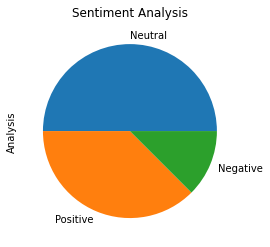

In [11]:
#Making a pie chart of value counts
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
df['Analysis'].value_counts().plot(kind='pie')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

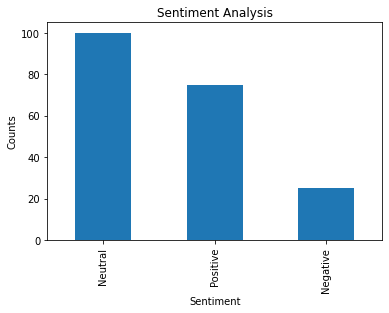

In [12]:
#Making a bar chart
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show

### Cleaning the data and retesting it

In [13]:
#function to clean it
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+', '', text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'https?:\/\/\S+', '',text)
    
    return text

#cleans the text
df['Tweets']= df['Tweets'].apply(cleanTxt)

#displays it
df


,Tweets,subjectivity,polarity,Analysis
0,Love you too brother!! 🙏🏾✊🏾❤️👑,0.600000,0.781250,Positive
1,"Hate on me, I blew but I'm the same OG\nPeople...",0.508333,-0.100000,Negative
2,OMFG!!!!!!!! 🤯🤯🤯🤯🤯🤯,0.000000,0.000000,Neutral
3,Where y'all finding all this content lately. M...,0.733333,0.350000,Positive
4,"Yessir!!!! Went yard then hit the ""Silencer""!!...",0.000000,0.000000,Neutral
...,...,...,...,...
195,Xmas game day is electrifying! Let’s get it!!...,0.400000,-0.781250,Negative
196,Dayumm I’m excited to play tomorrow on Xmas!! ...,0.675000,0.616211,Positive
197,🐐,0.000000,0.000000,Neutral
198,Probably need to add Big Shot Rob game winner...,0.250000,-0.312500,Negative


In [14]:
#Get Subjectivity   (opinion)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Get Polarity  (postitive or negative)
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Adds these to columns
df['subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['polarity'] = df['Tweets'].apply(getPolarity)

#Shows new dataframe
df

,Tweets,subjectivity,polarity,Analysis
0,Love you too brother!! 🙏🏾✊🏾❤️👑,0.600000,0.781250,Positive
1,"Hate on me, I blew but I'm the same OG\nPeople...",0.508333,-0.100000,Negative
2,OMFG!!!!!!!! 🤯🤯🤯🤯🤯🤯,0.000000,0.000000,Neutral
3,Where y'all finding all this content lately. M...,0.733333,0.350000,Positive
4,"Yessir!!!! Went yard then hit the ""Silencer""!!...",0.000000,0.000000,Neutral
...,...,...,...,...
195,Xmas game day is electrifying! Let’s get it!!...,0.400000,-0.781250,Negative
196,Dayumm I’m excited to play tomorrow on Xmas!! ...,0.675000,0.616211,Positive
197,🐐,0.000000,0.000000,Neutral
198,Probably need to add Big Shot Rob game winner...,0.250000,-0.312500,Negative


Cleaning the data did Ultimately not change any of the sentiment

### Trying to do it in Naive Bayes

In [15]:
#Naives Bayes Analyzer
def getNaive(text):
    text = TextBlob(text,analyzer=NaiveBayesAnalyzer())
    return text.sentiment

df['NaiveBayes'] = df['Tweets'].apply(getNaive)

#Shows new dataframe
df

KeyboardInterrupt: 

This code does not error, it just never loads

### Trying to make a wordcloud

In [16]:
#Making a wordcloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud - WordCloud(width = 500 , height = 300, random_state = 20, max_font_size=120).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

NameError: name 'wordCloud' is not defined